In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states

# Census API Key
from config import api_key
c = Census(api_key, year=2010)

In [79]:
# Importing csv files for wildfires and for census.
wildfires = pd.read_csv("NOAA_CSVs/wildfires_2010_2019.csv")
census_data = pd.read_csv("census_data_ca_county.csv")

In [87]:
wildfires = wildfires[['EVENT_ID','CZ_NAME_STR','CZ_FIPS']]#["CZ_FIPS"].unique()

In [88]:
wildfires

,EVENT_ID,CZ_NAME_STR,CZ_FIPS
0,234746,SAN BERNARDINO AND RIVERSIDE COUNTY VALLEYS - ...,48
1,250167,SAN DIEGO COUNTY COASTAL AREAS (ZONE),43
2,250175,SAN BERNARDINO AND RIVERSIDE COUNTY VALLEYS - ...,48
3,250169,RIVERSIDE COUNTY MOUNTAINS (ZONE),56
4,250171,SAN BERNARDINO AND RIVERSIDE COUNTY VALLEYS - ...,48
...,...,...,...
393,863910,VENTURA COUNTY COASTAL VALLEYS (ZONE),45
394,863913,VENTURA COUNTY INTERIOR VALLEYS (ZONE),44
395,863914,VENTURA COUNTY COASTAL VALLEYS (ZONE),45
396,863915,VENTURA COUNTY COAST (ZONE),40


In [22]:
wildfires_county_groups = wildfires.groupby("CZ_FIPS")
county_fire_counts = wildfires_county_groups["CZ_FIPS"].value_counts()

In [24]:
wildfires_county_groups["CZ_FIPS".head()

0      48
1      43
2      48
3      56
4      48
       ..
384    45
390    44
391    40
392    45
394    44
Name: CZ_FIPS, Length: 210, dtype: int64

In [77]:
def fires_by_county(fip):
    fire_count = 0
    for fire in wildfires["CZ_FIPS"]:
        fire_counts_list.append(wildfires["CZ_FIPS"])
    print(fire_count)

In [78]:
# Creates a new DataFrame which will pull out only the relevant columns.
wf_pop_analysis = pd.DataFrame()
wf_pop_analysis["FIP"] = census_data["County"]
wf_pop_analysis["Population"] = census_data["Population"].astype(int)
wf_pop_analysis["Fires Count"] = ""

fire_counts_list = []

for fip in wf_pop_analysis["FIP"]:
    wf_pop_analysis.set_index("FIP", inplace=True)
    fires_by_county(fip)
# Resets the index so FIPs column is in DataFrame but in order.    
wf_pop_analysis.reset_index()


0


KeyError: "None of ['FIP'] are in the columns"

In [60]:
wf_pop_analysis

,Population,Fires Count
FIP,,
47,250699,
49,9605,
51,13905,
53,407435,
55,134051,
57,98186,
59,2965525,
61,336477,
63,20392,


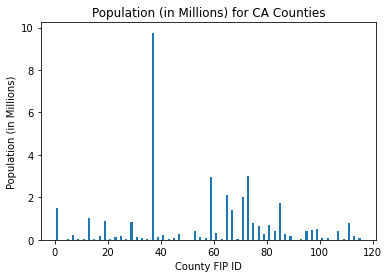

In [37]:
# Shows population in millions for each CA county.
plt.bar(wf_pop_analysis["FIP"],(wf_pop_analysis["Population"]/1000000))
plt.title("Population (in Millions) for CA Counties")
plt.xlabel("County FIP ID")
plt.ylabel("Population (in Millions)")

plt.savefig("jacob_pngs/CA_County_Populations.png")